In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import kurtosis, skew

In [71]:
#UK_data = pd.read_excel('Travelpac_cleaned_UK_new.xlsx', sheetname='Labelled 2014-2017')
#with the previous one, corrlation was in 0.8s 
UK_data = pd.read_excel('cleaned_UK_outliers_removed.xlsx', sheetname='Sheet1')

# Univariate

### Continuous

In [72]:
visits = UK_data['weighted_visits']
nights = UK_data['weighted_nights']
spend = UK_data['weighted_spend']
continuous = UK_data[['weighted_visits','weighted_nights','weighted_spend']]

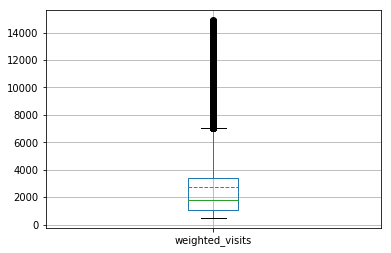

In [73]:
continuous.boxplot(column=['weighted_visits'], return_type='axes', showmeans=True, meanline=True) #return_type can be axes, dict or both
plt.show()

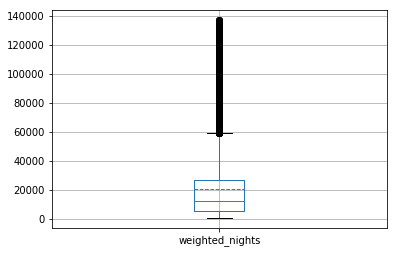

In [74]:
continuous.boxplot(column=['weighted_nights'], return_type='axes', showmeans=True, meanline=True) 
plt.show()

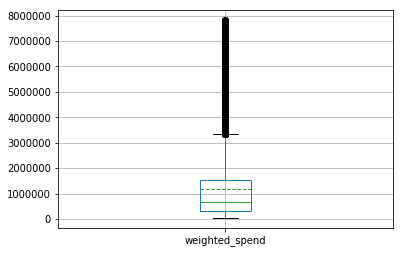

In [75]:
continuous.boxplot(column=['weighted_spend'], return_type='axes', showmeans=True, meanline=True) 
plt.show()

In [76]:
continuous.describe()

,weighted_visits,weighted_nights,weighted_spend
count,36274.000000,36274.000000,3.627400e+04
mean,2759.017223,20744.033684,1.175505e+06
std,2619.238056,23440.002144,1.327524e+06
min,481.850000,482.265000,3.640100e+04
25%,1038.528500,5227.464000,2.978090e+05
50%,1779.733000,11990.882500,6.804879e+05
75%,3434.064250,26782.906250,1.517547e+06
max,14894.505000,137049.600000,7.812774e+06


### Categorical

In [77]:
year = UK_data['Year']
q = UK_data['quarter']
transport = UK_data['mode_of_transport']
dest = UK_data['country']
purpose = UK_data['purpose_of_travel']
pack = UK_data['holiday_package']
age = UK_data['Age']
gender = UK_data['Sex']
duration = UK_data['duration']

In [78]:
#year
yoc=year.value_counts()
valyoc = yoc.sort_index()
yoc

2015    10244
2016    10111
2014     9197
2017     6722
Name: Year, dtype: int64

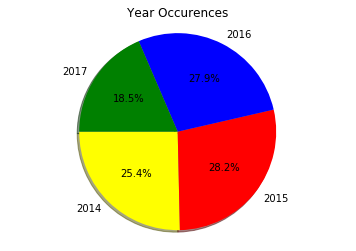

In [79]:
labels = ['2014', '2015', '2016', '2017']
colors = ['yellow', 'red', 'blue', 'green']
plt.pie(valyoc, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle = 180)
plt.title('Year Occurences')
plt.axis('equal')
plt.show()

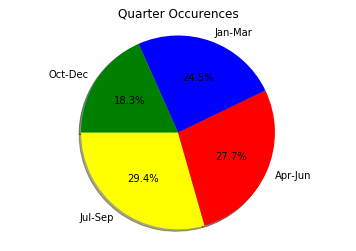

In [80]:
#quarter
qoc=q.value_counts()
labels = qoc.index
colors = ['yellow', 'red', 'blue', 'green']
plt.pie(qoc, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle = 180)
plt.title('Quarter Occurences')
plt.axis('equal')
plt.show()

In [81]:
#comparison quarters and year together
year = UK_data['Year']
y_occurances = year.value_counts()
y_occ_sorted = y_occurances.sort_index()
print('Number of rows per year:')
print(y_occ_sorted)
print('--------------------------------')
quarter = UK_data['quarter']
q_occurances = quarter.value_counts()
q_occ_sorted = q_occurances[['Jan-Mar', 'Apr-Jun','Jul-Sep','Oct-Dec']]
print('Number of rows per quarter:')
print(q_occ_sorted)

Number of rows per year:
2014     9197
2015    10244
2016    10111
2017     6722
Name: Year, dtype: int64
--------------------------------
Number of rows per quarter:
Jan-Mar     8888
Apr-Jun    10061
Jul-Sep    10670
Oct-Dec     6655
Name: quarter, dtype: int64


In [82]:
#mode of transport
toc=transport.value_counts()
toc

Air       25836
Sea        5898
Tunnel     4540
Name: mode_of_transport, dtype: int64

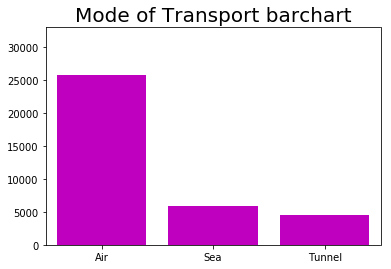

In [83]:
index = np.arange(3)
bw = 0.8 #the width of one of the 'towers'
plt.axis([0, 3, 0, 33000])
plt.title('Mode of Transport barchart', fontsize=20)
plt.bar(index+0.5, toc, bw, color='m') #start,what,width,color
plt.xticks(index+0.5, ['Air','Sea','Tunnel']) 
plt.show()

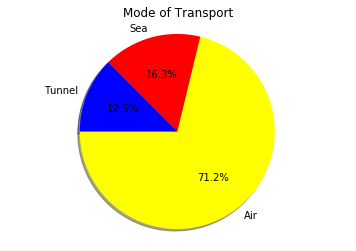

In [84]:
labels = toc.index
colors = ['yellow', 'red', 'blue']
plt.pie(toc, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle = 180)
plt.title('Mode of Transport')
plt.axis('equal')
plt.show()

In [85]:
#country
coc=dest.value_counts()
coc.count()

35

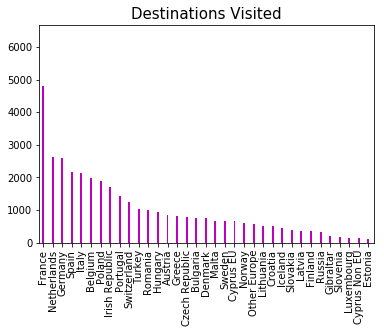

In [86]:
index = np.arange(35)
bw = 0.2 
plt.axis([0, 35, 0, 6679])
plt.title('Destinations Visited', fontsize=15)
plt.bar(index+0.4, coc, bw, color='m') #start,what,width,color
plt.xticks(index+0.4, coc.index, rotation=90) 
plt.show()

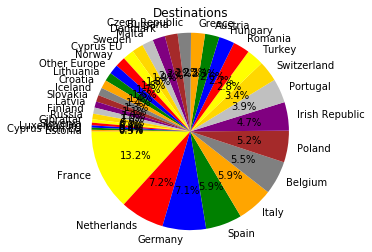

In [87]:
labels = coc.index
colors = ['yellow', 'red', 'blue', 'green', 'orange', 'grey', 'brown', 'purple', 'silver', 'gold']
plt.pie(coc, labels=labels, colors=colors, autopct='%1.1f%%', startangle = 180)
plt.title('Destinations')
plt.axis('equal')
plt.show()

In [88]:
#purpose of travel
puroc=purpose.value_counts()
puroc

Holiday          17673
VFR              11167
Business          5230
Miscellaneous     2036
Study              168
Name: purpose_of_travel, dtype: int64

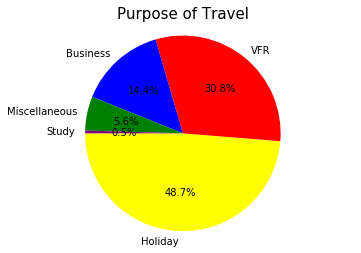

In [89]:
labels = puroc.index
colors = ['yellow', 'red', 'blue', 'green', 'purple']
plt.pie(puroc, labels=labels, colors=colors, autopct='%1.1f%%', startangle = 180)
plt.title('Purpose of Travel', fontsize=15)
plt.axis('equal')
plt.show()

In [90]:
#holiday package
hol_pac_dist=pack.value_counts()
hol_pac_dist

Independent        28772
Non-Independent     7502
Name: holiday_package, dtype: int64

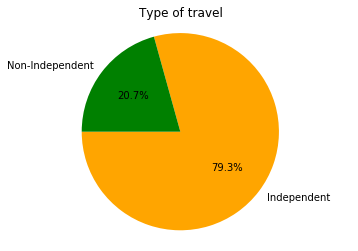

In [91]:
labels = hol_pac_dist.index
colors = ['orange', 'green']
plt.pie(hol_pac_dist, labels=labels, colors=colors, autopct='%1.1f%%', startangle = 180)
plt.title('Type of travel')
plt.axis('equal')
plt.show()

In [92]:
#age
aoc=age.value_counts()
aoc

25-34        6970
35-44        6593
45-54        6185
55-64        5150
16-24        4617
65 & over    3964
 0-15        2795
Name: Age, dtype: int64

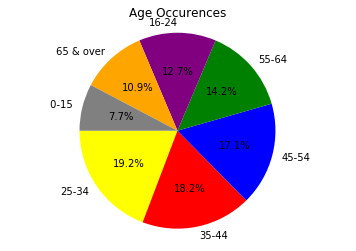

In [93]:
labels = aoc.index
colors = ['yellow', 'red', 'blue', 'green', 'purple', 'orange', 'grey']
plt.pie(aoc, labels=labels, colors=colors, autopct='%1.1f%%', startangle = 180)
plt.title('Age Occurences')
plt.axis('equal')
plt.show()

In [94]:
#sex
genoc=gender.value_counts()
genoc

Male      19699
Female    16575
Name: Sex, dtype: int64

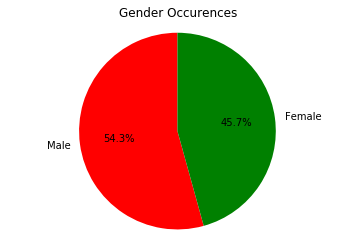

In [95]:
labels = genoc.index
colors = ['red', 'green']
plt.pie(genoc, labels=labels, colors=colors, autopct='%1.1f%%', startangle = 90)
plt.title('Gender Occurences')
plt.axis('equal')
plt.show()

In [96]:
#duration
duroc=duration.value_counts()
duroc

4 - 13 Nights      15781
1 - 3 Nights       12021
14 - 27 Nights      6058
28 - 90 Nights      2255
3 - 6 Months         156
6 Months - Year        3
Name: duration, dtype: int64

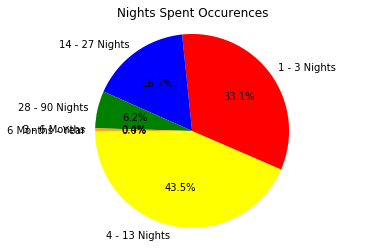

In [97]:
colors = ['yellow', 'red', 'blue', 'green', 'orange', 'pink']
plt.pie(duroc, labels=duroc.index, colors=colors, autopct='%1.1f%%', startangle = 180)
plt.title('Nights Spent Occurences')
plt.axis('equal')
plt.show()

# Multivariate

### Continuous and continuous

In [98]:
vscorr=UK_data['weighted_visits'].corr(UK_data['weighted_spend'])
nscorr=UK_data['weighted_nights'].corr(UK_data['weighted_spend'])
vncorr=UK_data['weighted_visits'].corr(UK_data['weighted_nights'])
print('Visits-Spend correlation = ', vscorr)
print('Nights-Spend correlation = ', nscorr)
print('Visits-Nights correlation = ', vncorr)

Visits-Spend correlation =  0.673701397417
Nights-Spend correlation =  0.574611586006
Visits-Nights correlation =  0.512243523501


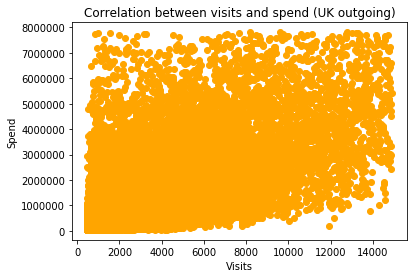

In [99]:
plt.scatter(UK_data['weighted_visits'], UK_data['weighted_spend'], c='orange')
plt.title('Correlation between visits and spend (UK outgoing)')
plt.xlabel('Visits')
plt.ylabel('Spend')
plt.show()

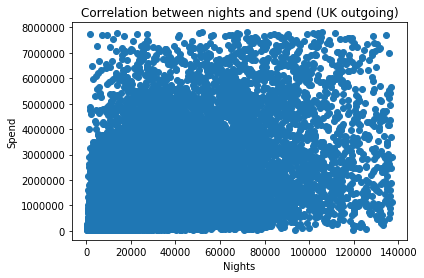

In [100]:
plt.scatter(UK_data['weighted_nights'], UK_data['weighted_spend'])
plt.title('Correlation between nights and spend (UK outgoing)')
plt.xlabel('Nights')
plt.ylabel('Spend')
plt.show()

## Categorical and continuous

### Year

C:\Users\Marvin\anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


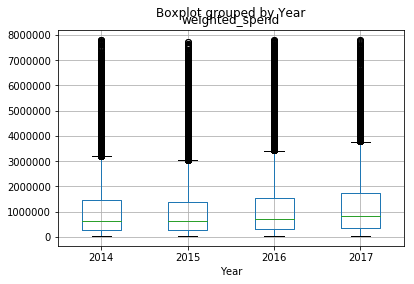

In [101]:
UK_data.boxplot(column="weighted_spend",
                 by= "Year")  
plt.show()

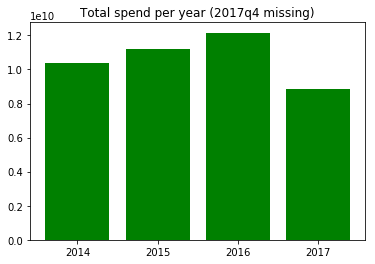

In [102]:
yearsSUM = UK_data.groupby('Year').sum() # 2017 affected as q4 is not included
spend_years = yearsSUM['weighted_spend']
plt.bar(yearsSUM.index, spend_years, color='g')
plt.xticks(yearsSUM.index)
plt.title('Total spend per year (2017q4 missing)')
plt.show()

In [103]:
yearsSUM

,weighted_visits,weighted_nights,weighted_spend
Year,,,
2014,2.461140e+07,1.804738e+08,1.039890e+10
2015,2.687597e+07,2.027995e+08,1.120696e+10
2016,2.821071e+07,2.126926e+08,1.215636e+10
2017,2.038251e+07,1.565032e+08,8.878045e+09


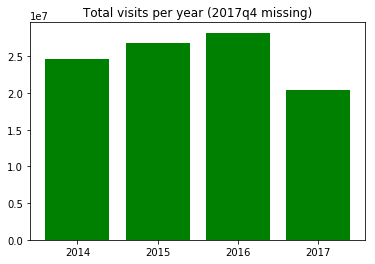

In [104]:
visits_years = yearsSUM['weighted_visits']
plt.bar(yearsSUM.index, visits_years,color='g')
plt.xticks(yearsSUM.index)
plt.title('Total visits per year (2017q4 missing)')
plt.show()

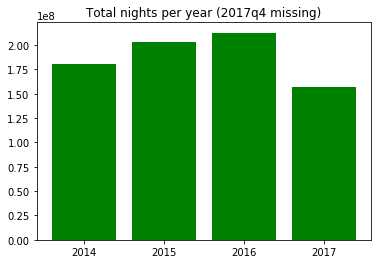

In [105]:
nights_years = yearsSUM['weighted_nights']
plt.bar(yearsSUM.index, nights_years, color='g')
plt.xticks(yearsSUM.index)
plt.title('Total nights per year (2017q4 missing)')
plt.show()

### Quarter

In [106]:
qSUM = UK_data.groupby('quarter').sum()
qSUM

,Year,weighted_visits,weighted_nights,weighted_spend
quarter,,,,
Apr-Jun,20277823,2.851364e+07,2.012777e+08,1.186140e+10
Jan-Mar,17913910,2.290110e+07,1.605667e+08,9.288130e+09
Jul-Sep,21504970,2.999296e+07,2.720031e+08,1.413866e+10
Oct-Dec,13409765,1.867289e+07,1.186216e+08,7.352066e+09


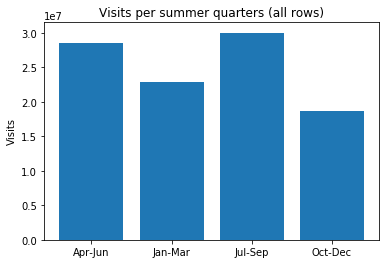

In [107]:
visits_quarter = qSUM['weighted_visits']


plt.bar(visits_quarter.index, visits_quarter)

plt.xticks(visits_quarter.index)
plt.ylabel('Visits')
plt.title('Visits per summer quarters (all rows)')
plt.show()

In [108]:
qMEAN = UK_data.groupby('quarter').mean()
qMEAN = qMEAN.reindex(index = ['Jan-Mar', 'Apr-Jun', 'Jul-Sep', 'Oct-Dec'])
qMEAN

,Year,weighted_visits,weighted_nights,weighted_spend
quarter,,,,
Jan-Mar,2015.516427,2576.631714,18065.561909,1.045019e+06
Apr-Jun,2015.487824,2834.076217,20005.735404,1.178949e+06
Jul-Sep,2015.461106,2810.961635,25492.324824,1.325085e+06
Oct-Dec,2014.990984,2805.843218,17824.425821,1.104743e+06


In [109]:
yqSUM = UK_data.groupby(['Year', 'quarter']).sum()
yqSUM

weighted_visits  weighted_nights  weighted_spend
Year quarter                                                  
2014 Apr-Jun      6699962.729     4.597881e+07    2.706922e+09
     Jan-Mar      5124180.093     3.564982e+07    2.163968e+09
     Jul-Sep      7063466.999     6.295425e+07    3.301286e+09
     Oct-Dec      5723791.854     3.589090e+07    2.226723e+09
2015 Apr-Jun      7154112.524     4.991678e+07    2.881216e+09
     Jan-Mar      5528383.948     3.932748e+07    2.208494e+09
     Jul-Sep      7707688.619     7.163216e+07    3.559590e+09
     Oct-Dec      6485789.584     4.192312e+07    2.557657e+09
2016 Apr-Jun      7698393.614     5.571810e+07    3.324858e+09
     Jan-Mar      6102712.596     4.380639e+07    2.467524e+09
     Jul-Sep      7946297.007     7.236055e+07    3.796288e+09
     Oct-Dec      6463305.178     4.080753e+07    2.567686e+09
2017 Apr-Jun      6961171.952     4.966402e+07    2.948405e+09
     Jan-Mar      6145826.040     4.178303e+07    2.448144e+09
     Jul-Sep      7275508.024     6.505614e+07    3.481496e+09

In [110]:
yqSUM= yqSUM.reindex(index = ['Jan-Mar', 'Apr-Jun', 'Jul-Sep', 'Oct-Dec'], level = 'quarter')
yqSUM

weighted_visits  weighted_nights  weighted_spend
Year quarter                                                  
2014 Jan-Mar      5124180.093     3.564982e+07    2.163968e+09
     Apr-Jun      6699962.729     4.597881e+07    2.706922e+09
     Jul-Sep      7063466.999     6.295425e+07    3.301286e+09
     Oct-Dec      5723791.854     3.589090e+07    2.226723e+09
2015 Jan-Mar      5528383.948     3.932748e+07    2.208494e+09
     Apr-Jun      7154112.524     4.991678e+07    2.881216e+09
     Jul-Sep      7707688.619     7.163216e+07    3.559590e+09
     Oct-Dec      6485789.584     4.192312e+07    2.557657e+09
2016 Jan-Mar      6102712.596     4.380639e+07    2.467524e+09
     Apr-Jun      7698393.614     5.571810e+07    3.324858e+09
     Jul-Sep      7946297.007     7.236055e+07    3.796288e+09
     Oct-Dec      6463305.178     4.080753e+07    2.567686e+09
2017 Jan-Mar      6145826.040     4.178303e+07    2.448144e+09
     Apr-Jun      6961171.952     4.966402e+07    2.948405e+09
     Jul-Sep      7275508.024     6.505614e+07    3.481496e+09

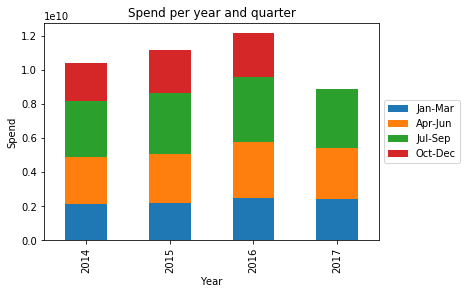

In [111]:
yqdata= yqSUM['weighted_spend'] 
yqdata.unstack().plot(kind="bar", stacked=True, )
plt.title('Spend per year and quarter')
plt.ylabel('Spend')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

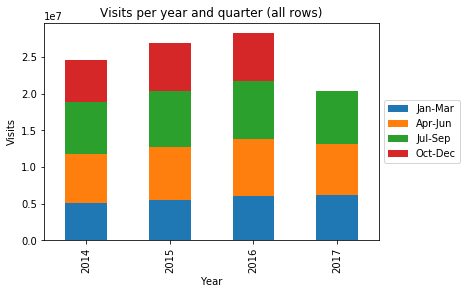

In [112]:
yqvisit= yqSUM['weighted_visits'] 
yqvisit.unstack().plot(kind="bar", stacked=True, )
plt.title('Visits per year and quarter (all rows)')
plt.ylabel('Visits')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

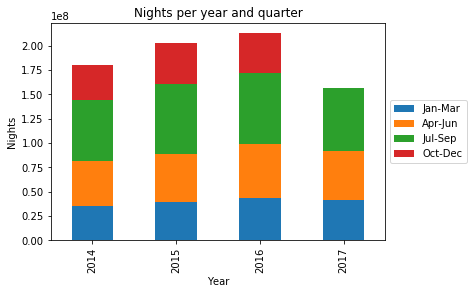

In [113]:
yqnights= yqSUM['weighted_nights'] 
yqnights.unstack().plot(kind="bar", stacked=True, )
plt.title('Nights per year and quarter')
plt.ylabel('Nights')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1)
plt.show()

### Mode of transport

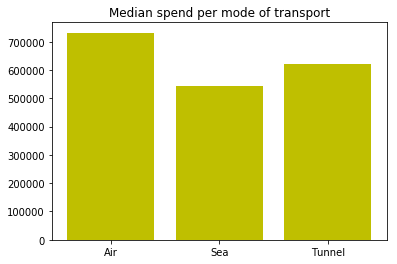

In [114]:
transportMedian = UK_data.groupby('mode_of_transport').median() #for mean the air is even more prevalent 
spend_transport = transportMedian['weighted_spend']
plt.bar(transportMedian.index, spend_transport, color='y')
plt.xticks(transportMedian.index)
plt.title('Median spend per mode of transport')
plt.show()
#the most expensive holidays seem to be travelled to by air - but other options are not necessarly much cheaper

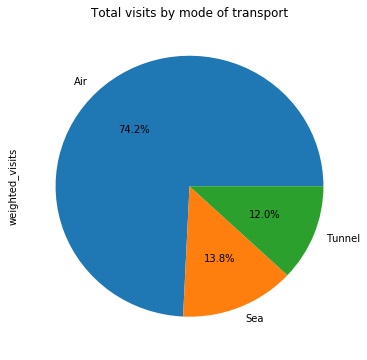

In [115]:
transportSum = UK_data.groupby('mode_of_transport').sum()
transportSum['weighted_visits'].plot(kind='pie',figsize=(6,6), autopct='%1.1f%%')
plt.title('Total visits by mode of transport')
plt.show()

### Country

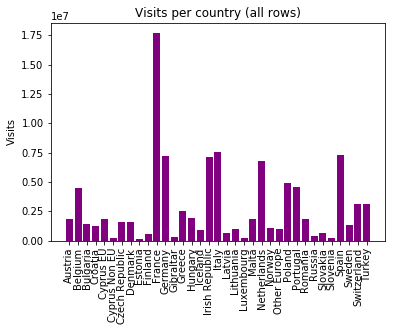

In [116]:
countrySum = UK_data.groupby('country').sum()
visits_country = countrySum['weighted_visits']
plt.bar(countrySum.index, visits_country, color='purple')
plt.xticks(countrySum.index, rotation=90) 
plt.ylabel('Visits')
plt.title('Visits per country (all rows)')
plt.show()

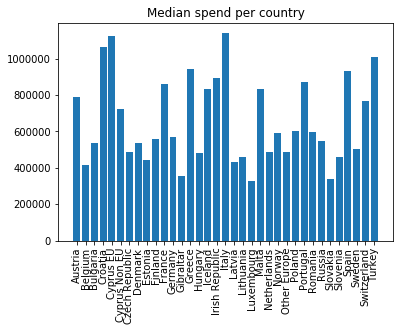

In [117]:
countryM = UK_data.groupby('country').median()
spend_country = countryM['weighted_spend']
plt.bar(countryM.index, spend_country)
plt.xticks(countryM.index, rotation=90)
plt.title('Median spend per country')
plt.show()

### purpose_of_travel

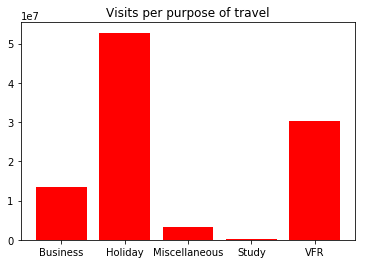

In [118]:
purpose = UK_data.groupby('purpose_of_travel').sum()
spend_purpose = purpose['weighted_visits']
plt.bar(purpose.index, spend_purpose, color = 'red')
plt.xticks(purpose.index)
plt.title('Visits per purpose of travel')
plt.show()
#I can't believe that business is not even higher in average spend (everything is expensed!)

### holiday_package

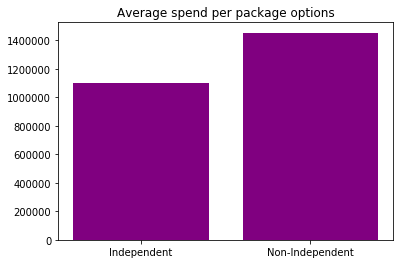

In [119]:
package = UK_data.groupby('holiday_package').mean()
spend_package = package['weighted_spend']
plt.bar(package.index, spend_package, color = 'purple')
plt.xticks(package.index)
plt.title('Average spend per package options')
plt.show()
#independent travel is clearly cheaper

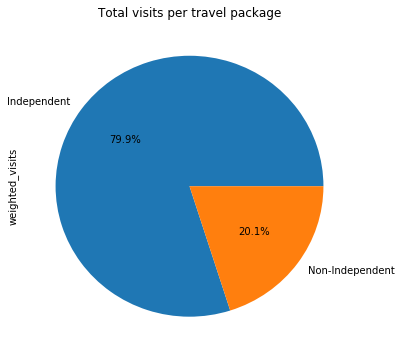

In [120]:
packageSum = UK_data.groupby('holiday_package').sum()
packageSum['weighted_visits'].plot(kind='pie',figsize=(6,6), autopct='%1.1f%%')
plt.title('Total visits per travel package')
plt.show()
#more people travelling independently and therefore spending more overall

In [121]:
#filtered for non-independent travel and duration
non_ind = UK_data.loc[UK_data['holiday_package']=='Non-Independent']
nind_dur = non_ind.loc[non_ind['duration']=='4 - 13 Nights'] #'1 - 3 Nights' is pretty specific but I guess this duration is more popular for packaged holiday
country = nind_dur.groupby('country').sum()

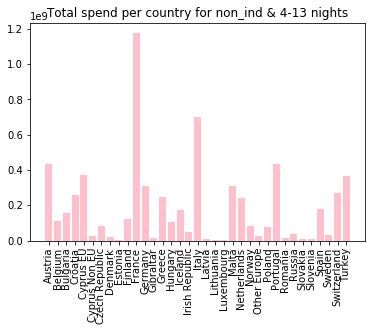

In [122]:
spend_pack_country = country['weighted_spend']
plt.bar(country.index, spend_pack_country, color = 'pink')
plt.xticks(country.index, rotation=90)
plt.title('Total spend per country for non_ind & 4-13 nights')
plt.show()

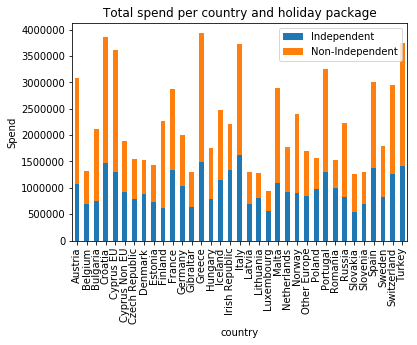

In [123]:
country_ind = UK_data.groupby(['country', 'holiday_package']).mean()
c_spend= country_ind['weighted_spend'] 
c_spend.unstack().plot(kind="bar", stacked=True, )
plt.title('Total spend per country and holiday package')
plt.ylabel('Spend')
plt.legend(loc=1)
plt.show()

### Age	

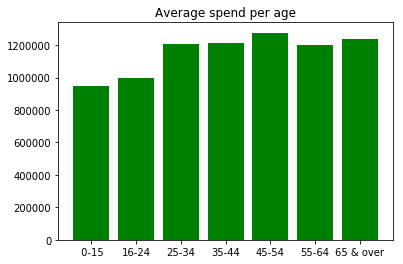

In [124]:
age = UK_data.groupby('Age').mean()
spend_age = age['weighted_spend']
plt.bar(age.index, spend_age, color='g')
plt.xticks(age.index)
plt.title('Average spend per age')
plt.show()

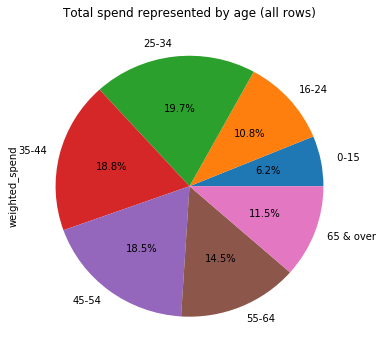

In [125]:
tage = UK_data.groupby('Age').sum()
tage['weighted_spend'].plot(kind='pie',figsize=(6,6), autopct='%1.1f%%')
plt.title('Total spend represented by age (all rows)')
plt.show()

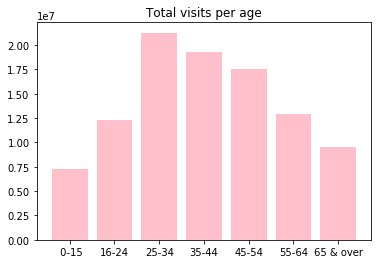

In [126]:
visits_age = tage['weighted_visits']
plt.bar(tage.index, visits_age, color='pink')
plt.xticks(tage.index)
plt.title('Total visits per age')
plt.show()

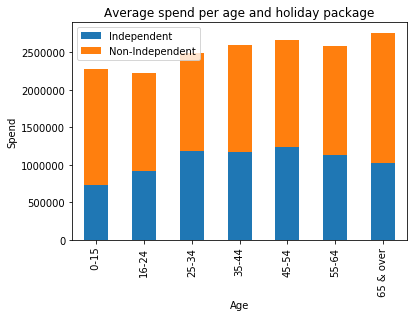

In [127]:
age_ind = UK_data.groupby(['Age', 'holiday_package']).mean()
#age_ind = cdMEAN.reindex(index = ['', 'Apr-Jun', 'Jul-Sep', 'Oct-Dec'], level = 'quarter')
ag_spend= age_ind['weighted_spend'] 
ag_spend.unstack().plot(kind="bar", stacked=True, )
plt.title('Average spend per age and holiday package')
plt.ylabel('Spend')
plt.legend(loc=2)
plt.show()

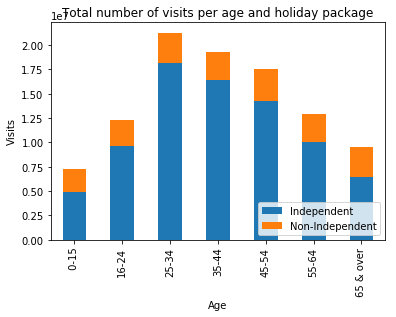

In [128]:
age_ind_sum = UK_data.groupby(['Age', 'holiday_package']).sum()
ag_visits= age_ind_sum['weighted_visits'] 
ag_visits.unstack().plot(kind="bar", stacked=True, )
plt.title('Total number of visits per age and holiday package')
plt.ylabel('Visits')
plt.legend(loc=4)
plt.show()

### Sex

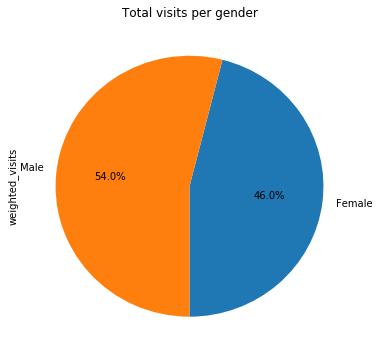

In [129]:
tsex = UK_data.groupby('Sex').sum()
tsex['weighted_visits'].plot(kind='pie',figsize=(6,6), autopct='%1.1f%%', startangle=270)
plt.title('Total visits per gender')
plt.show()
#more males travelling

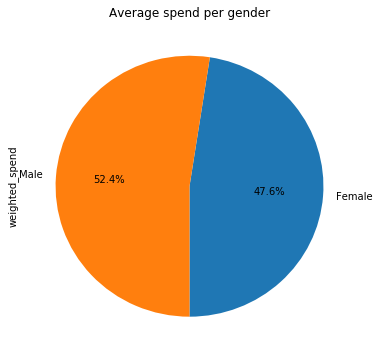

In [130]:
msex = UK_data.groupby('Sex').mean()
msex['weighted_spend'].plot(kind='pie',figsize=(6,6), autopct='%1.1f%%', startangle=270)
plt.title('Average spend per gender')
plt.show()

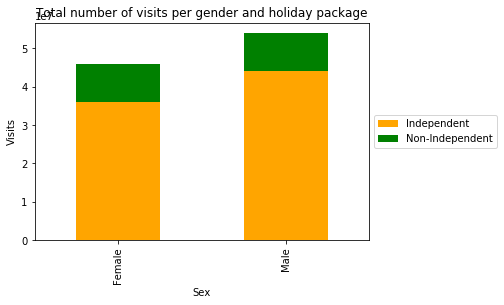

In [131]:
sex_ind_sum = UK_data.groupby(['Sex', 'holiday_package']).sum()
si_visits= sex_ind_sum['weighted_visits'] 
si_visits.unstack().plot(kind="bar", stacked=True, color=['orange', 'green'])
plt.title('Total number of visits per gender and holiday package')
plt.ylabel('Visits')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

### duration

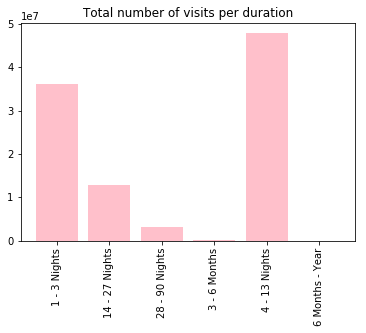

In [132]:
duration_sum = UK_data.groupby(['duration']).sum()
d_visits= duration_sum['weighted_visits'] 
plt.bar(duration_sum.index, d_visits, color='pink')
plt.xticks(duration_sum.index, rotation=90)
plt.title('Total number of visits per duration')
plt.show()
#those need to be grouped overall in our data set as there are two records of most of them

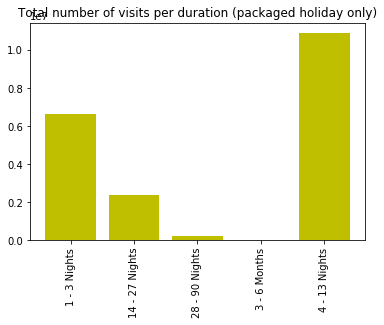

In [133]:
duration_sum = non_ind.groupby(['duration']).sum()
d_visits= duration_sum['weighted_visits'] 
plt.bar(duration_sum.index, d_visits, color='y')
plt.xticks(duration_sum.index, rotation=90)
plt.title('Total number of visits per duration (packaged holiday only)')
plt.show()